In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size':16})

## Problem 1.

In [3]:
# read in data

data = np.genfromtxt('data_p1.txt', usecols = range(3));
x_data = data[4:,0];
y_data = data[4:,1];
y_err = data[4:,2];

n_data = len(x_data)

In [4]:
# construct linalg object

a_mat = np.array([np.ones(n_data), x_data]).T

cov_inv = (a_mat.T/y_err**2).dot(a_mat)
cov = np.linalg.solve(cov_inv, np.identity(2))

suff_stat = (a_mat.T/y_err**2).dot(y_data)

theta = cov.dot(suff_stat)

print(f'best fit m: {theta[1]}')
print(f'best fit b: {theta[0]}')
print(f'standard uncertainty variance $\sigma_m^2$: {cov[1,1]}')

best fit m: 2.2399208316310926
best fit b: 34.04772775754191
standard uncertainty variance $\sigma_m^2$: 0.01161663112329745


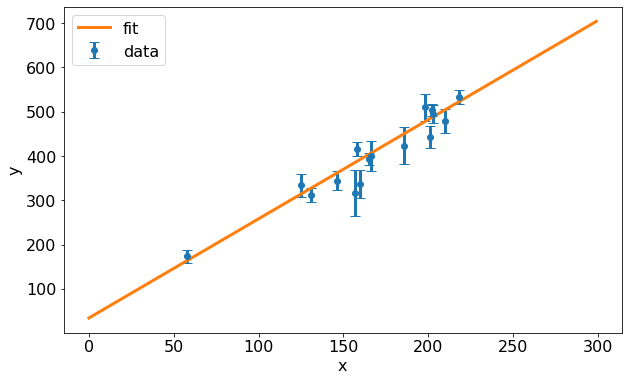

In [5]:
# plot the result

x_ar = np.arange(0, 300)
y_ar = theta[1]*x_ar + theta[0]

plt.figure(figsize = (10, 6))
plt.errorbar(x_data, y_data, yerr = y_err, linestyle = 'None', 
             marker = 'o', lw = 3, capsize = 5, label = 'data')
plt.plot(x_ar, y_ar, lw = 3, label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Problem 2.

In [6]:
x_data_2 = data[:,0];
y_data_2 = data[:,1];
y_err_2 = data[:,2];

n_data_2 = len(x_data_2)

In [7]:
# construct linalg object

a_mat_2 = np.array([np.ones(n_data_2), x_data_2]).T

cov_inv_2 = (a_mat_2.T/y_err_2**2).dot(a_mat_2)
cov_2 = np.linalg.solve(cov_inv_2, np.identity(2))

suff_stat_2 = (a_mat_2.T/y_err_2**2).dot(y_data_2)

theta_2 = cov_2.dot(suff_stat_2)

print(f'best fit m: {theta_2[1]}')
print(f'best fit b: {theta_2[0]}')
print(f'standard uncertainty variance $\sigma_m^2$: {cov_2[1,1]}')

best fit m: 1.0767475241683258
best fit b: 213.27349197596004
standard uncertainty variance $\sigma_m^2$: 0.005991810080070381


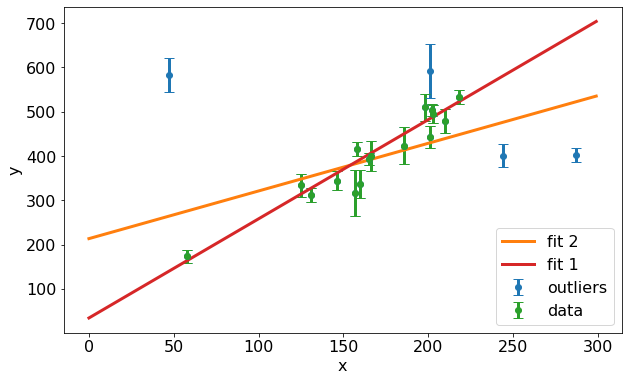

In [8]:
# plot the result

y_ar_2 = theta_2[1]*x_ar + theta_2[0]

plt.figure(figsize = (10, 6))
plt.errorbar(x_data_2, y_data_2, yerr = y_err_2, linestyle = 'None', 
             marker = 'o', lw = 3, capsize = 5, label = 'outliers')
plt.plot(x_ar, y_ar_2, lw = 3, label = 'fit 2')
plt.errorbar(x_data, y_data, yerr = y_err, linestyle = 'None', 
             marker = 'o', lw = 3, capsize = 5, label = 'data')
plt.plot(x_ar, y_ar, lw = 3, label = 'fit 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Things that I don't like about the result is that by adding the first four data point, it significantlt worsen the fit. We can think of the new points as outliers as they lie really far away from fit 1.

## Problem 3.

In [9]:
# construct linalg object

a_mat_3 = np.array([np.ones(n_data), x_data, x_data**2]).T

cov_inv_3 = (a_mat_3.T/y_err**2).dot(a_mat_3)
cov_3 = np.linalg.solve(cov_inv_3, np.identity(3))

suff_stat_3 = (a_mat_3.T/y_err**2).dot(y_data)

theta_3 = cov_3.dot(suff_stat_3)

print(f'best fit q: {theta_3[2]}')
print(f'best fit m: {theta_3[1]}')
print(f'best fit b: {theta_3[0]}')

best fit q: 0.0022988884081223127
best fit m: 1.5960504522745396
best fit b: 72.89462647168693


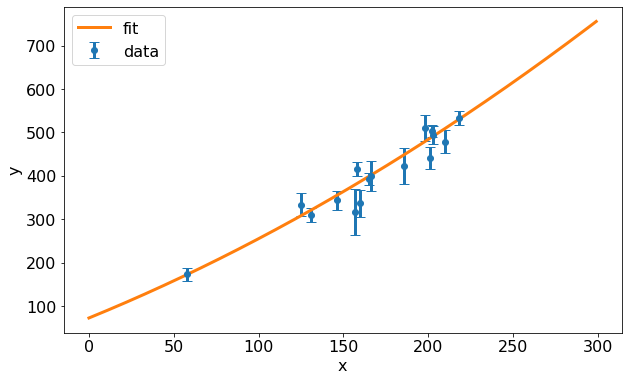

In [10]:
# plot the result

y_ar_3 = theta_3[2]*x_ar**2 + theta_3[1]*x_ar + theta_3[0]

plt.figure(figsize = (10, 6))
plt.errorbar(x_data, y_data, yerr = y_err, linestyle = 'None', 
             marker = 'o', lw = 3, capsize = 5, label = 'data')
plt.plot(x_ar, y_ar_3, lw = 3, label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Problem 8.

In [11]:
print(f'standard uncertainty variance $\sigma_m^2$ in Problem 2.: {cov_2[1,1]}')

standard uncertainty variance $\sigma_m^2$ in Problem 2.: 0.005991810080070381


### Jackknife

In [12]:
m_ar_j = np.zeros(n_data_2)
b_ar_j = np.zeros(n_data_2)

for i in range(n_data_2):
    x_data_j = np.delete(x_data_2, i)
    y_data_j = np.delete(y_data_2, i)
    y_err_j = np.delete(y_err_2, i)
    
    # construct linalg object

    a_mat_j = np.array([np.ones(n_data_2 - 1), x_data_j]).T

    cov_inv_j = (a_mat_j.T/y_err_j**2).dot(a_mat_j)
    cov_j = np.linalg.solve(cov_inv_j, np.identity(2))

    suff_stat_j = (a_mat_j.T/y_err_j**2).dot(y_data_j)

    theta_j = cov_j.dot(suff_stat_j)
    m_ar_j[i] = theta_j[1]
    b_ar_j[i] = theta_j[0]

In [13]:
sigma_m_j = np.var(m_ar_j)*(n_data_2 - 1)
print(f'standard uncertainty variance $\sigma_m$ via jackknife: {sigma_m_j}')

standard uncertainty variance $\sigma_m$ via jackknife: 0.7639460804701288


### Bootstrap

In [14]:
trial = 1000

m_ar_b = np.zeros(trial)
b_ar_b = np.zeros(trial)

for i in range(trial):
    ind = np.random.choice(range(n_data_2), size = n_data_2)
    x_data_b = x_data_2[ind]
    y_data_b = y_data_2[ind]
    y_err_b = y_err_2[ind]
    
    # construct linalg object

    a_mat_b = np.array([np.ones(n_data_2), x_data_b]).T

    cov_inv_b = (a_mat_b.T/y_err_b**2).dot(a_mat_b)
    cov_b = np.linalg.solve(cov_inv_b, np.identity(2))

    suff_stat_b = (a_mat_b.T/y_err_b**2).dot(y_data_b)

    theta_b = cov_b.dot(suff_stat_b)
    m_ar_b[i] = theta_b[1]
    b_ar_b[i] = theta_b[0]

In [15]:
sigma_m_b = np.mean((m_ar_b - theta_2[1])**2)
print(f'standard uncertainty variance $\sigma_m^2$ via bootstrap: {sigma_m_b}')

standard uncertainty variance $\sigma_m^2$ via bootstrap: 0.38578805371674724
